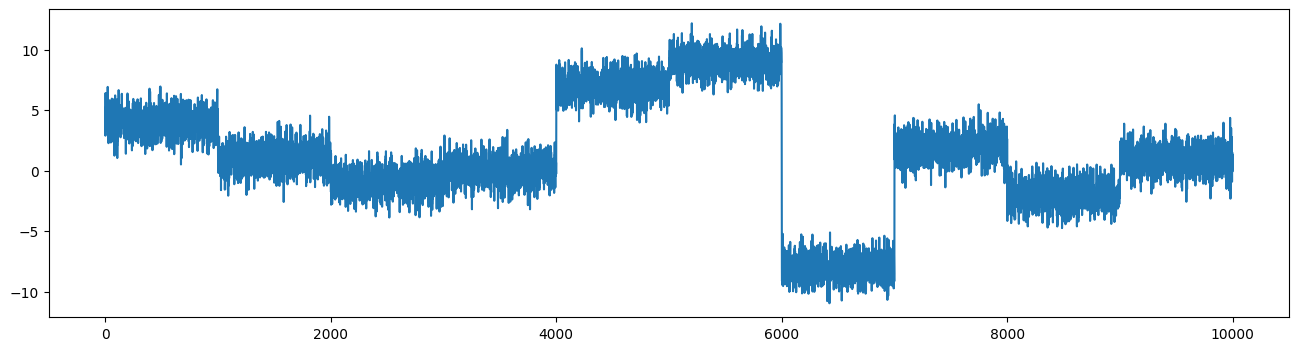

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# example 1: constant variance
ts1 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    ts = np.random.normal(mu, sigma, seg) + np.random.randint(low=-10, high=10)
    ts1 = np.append(ts1, ts, axis=0)
    
plt.figure(figsize=(16,4))
plt.plot(ts1)

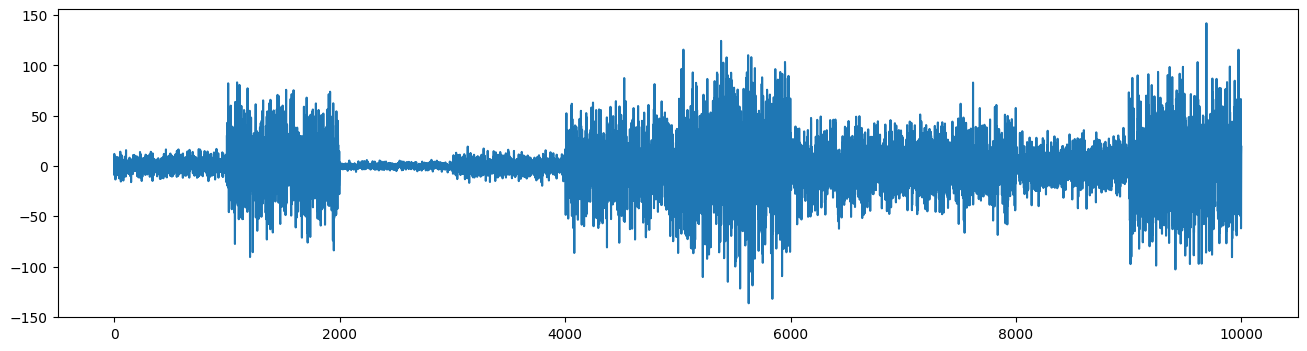

In [3]:
# example 2: changing variance
ts2 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    sig = np.random.randint(low=1, high=50)
    ts = np.random.normal(mu, sigma*sig, seg)
    ts2 = np.append(ts2, ts, axis=0)

plt.figure(figsize=(16,4))
plt.plot(ts2)

In [4]:
!pip install ruptures


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


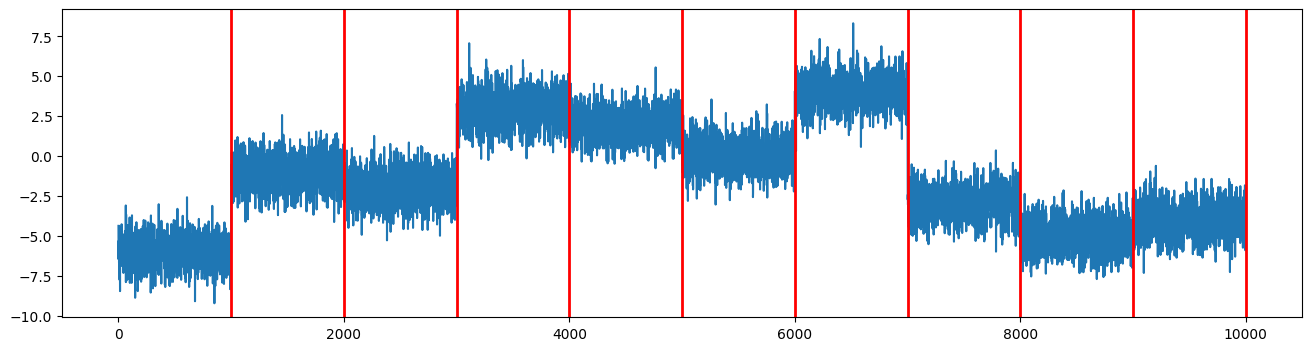

In [6]:
import ruptures as rpt

# detect the change points
algo1 = rpt.Pelt(model="rbf").fit(ts1)
change_location1 = algo1.predict(pen=10)

# point the change points
def plot_change_points(ts, ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x, lw=2, color="red")

plot_change_points(ts1, change_location1)

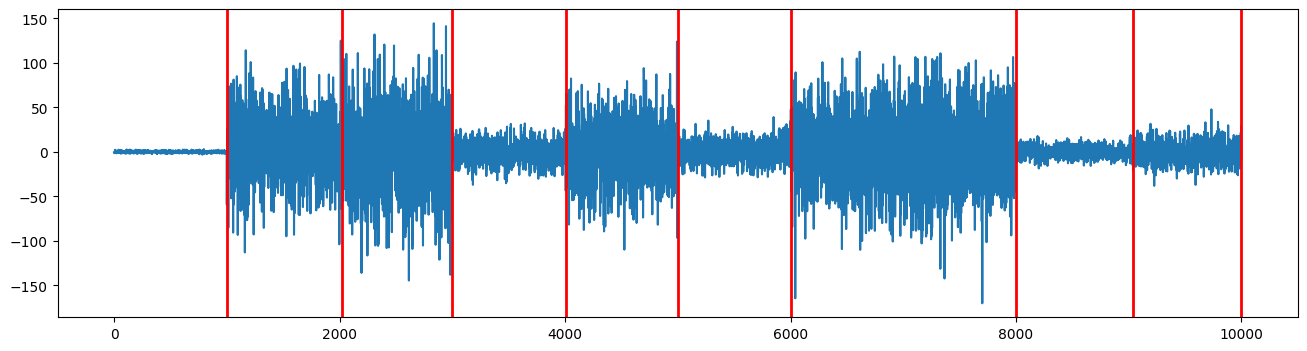

In [7]:
# detect the change points
algo2 = rpt.Pelt(model="rbf").fit(ts2)
change_location2 = algo2.predict(pen=10)
change_location2

# plot the change points
plot_change_points(ts2, change_location2)

In [8]:
!pip install changefinder

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.6 MB 9.0 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.6 MB 13.5 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 14.3 MB/s  0:00:00
  Created wheel for changefinder: filename=changefinder-0.3-py3-none-any.whl size=3921 sha256=eb8452fb6f72410b7870af2b1eceb3c6639c526eeb6dc143480a621b6afbb5b8
  Stored in directory: c:\users\l03055876\appdata\local\pip\cache\wheels\87\d7\6b\f2360569f8deb8a072bcff6f3a589faacbc49aa96756339624
Succe


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


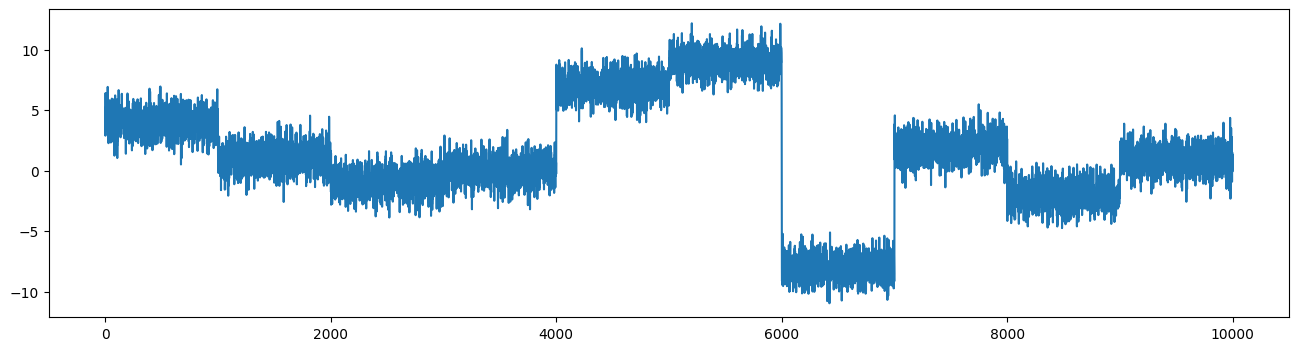

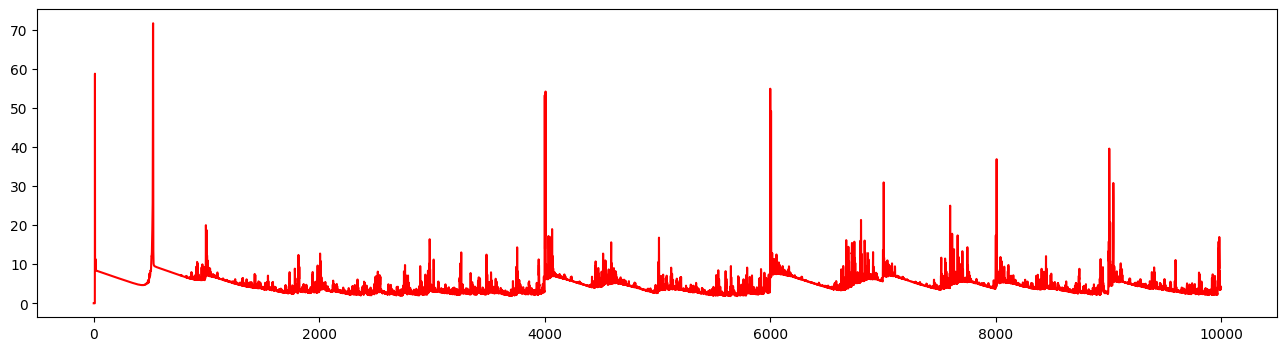

In [4]:
import changefinder

def findChangePoints(ts, r, order, smooth):
    '''
    r: Discounting rate
    order: AR model order
    smooth: smoothing window size T
    '''
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    plt.figure(figsize=(16,4))
    plt.plot(ts_score, color="red")
    return(ts_score)

ts_score1 = findChangePoints(ts1, r=0.01, order=3, smooth=5)

In [5]:
ts_change_loc1 = pd.Series(ts_score1).nlargest(20)
ts_change_loc1 = ts_change_loc1.index
np.sort(ts_change_loc1)

array([  11,  524,  525,  526,  527,  528, 4000, 4001, 4007, 4008, 6000,
       6001, 6007, 6008, 7007, 8008, 8009, 9008, 9009, 9044], dtype=int64)

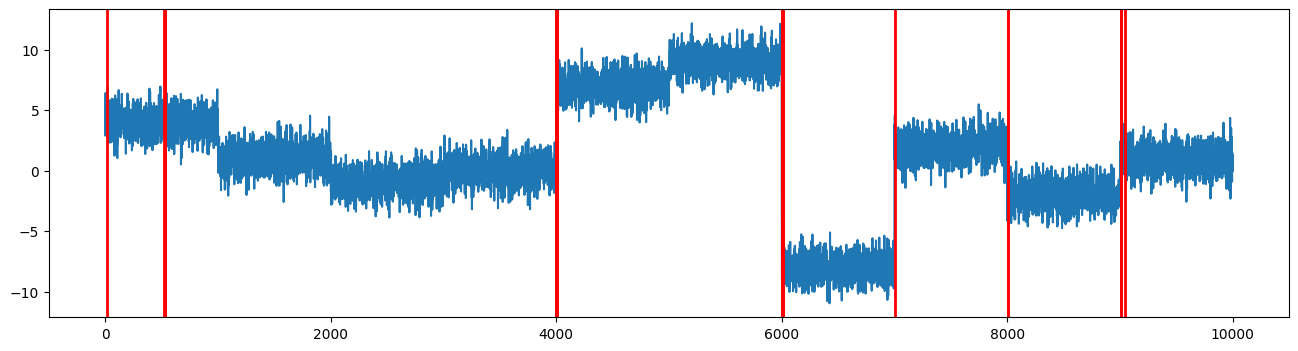

In [6]:
def plot_change_points(ts, ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x, lw=2, color="red")
        
plot_change_points(ts1, ts_change_loc1)

array([  11,   12,   13,   14,  342,  343,  347,  348,  414, 1010, 1011,
       3018, 3019, 4006, 4007, 4013, 4018, 4019, 9002, 9009], dtype=int64)

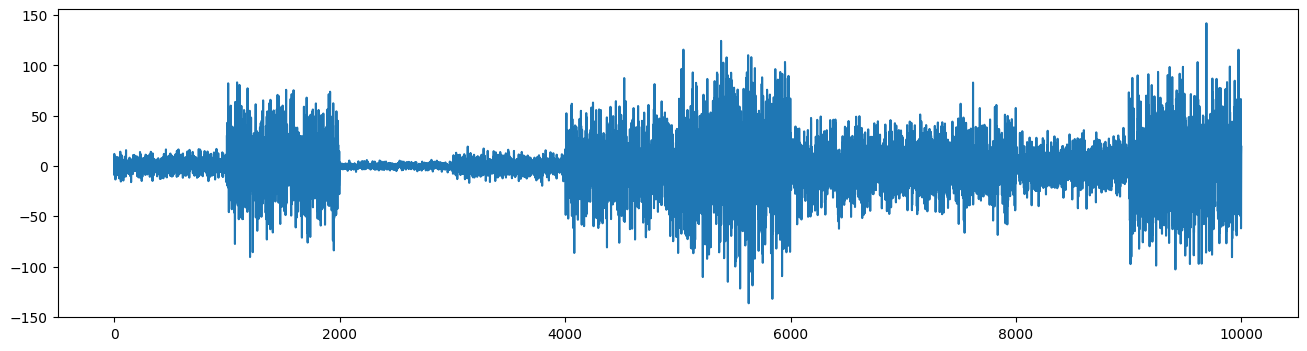

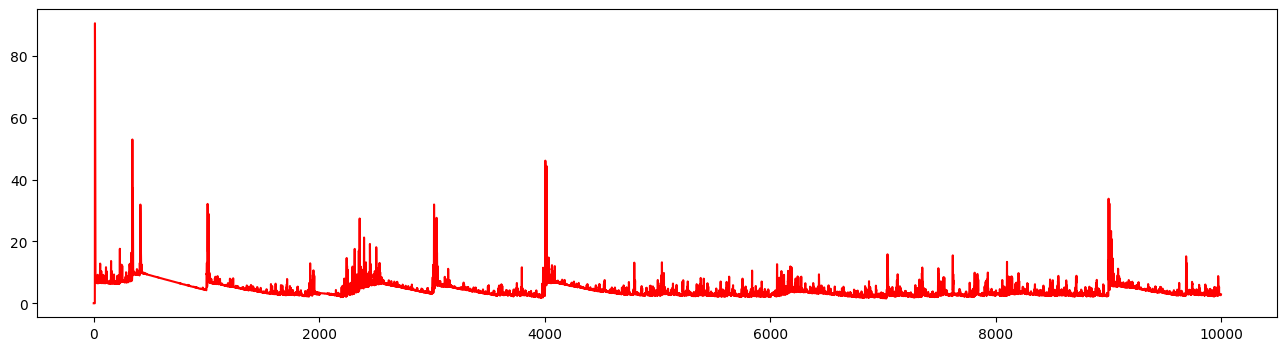

In [7]:
ts_score2 = findChangePoints(ts2, r=0.01, order=3, smooth=5)
ts_change_loc2 = pd.Series(ts_score2).nlargest(20)
ts_change_loc2 = ts_change_loc2.index
np.sort(ts_change_loc2)

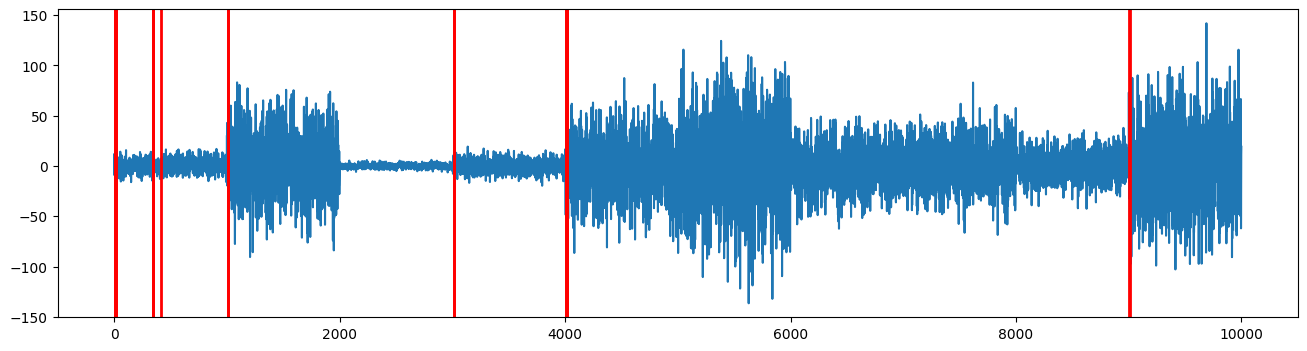

In [9]:
plot_change_points(ts2, ts_change_loc2)